In [4]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

# Nazewnictwo
insert_sort to funkcja podstawowa, która była dalej modyfikowana. Dodatek w nazwie "_wo_condition" wskazuje na brak testowania warunku wg zadania z teams. 


In [176]:
def replace_min(source):
    if len(source) > 0:
        for i in range(len(source)):
            if source[i] == min(source):
                source[i], source[0] = source[0], source[i]
                break

In [177]:
def insert_sort(source):
    for i in range(1, len(source)):
        temp = source[i]
        j = i - 1
        while(j>=0 and source[j]>temp):
            source[j+1] = source[j]
            j-=1
        source[j+1] = temp
    return source

In [178]:
def insert_sort_wo_condition(source):
    replace_min(source)
    for i in range(1, len(source)):
        temp = source[i]
        j = i - 1
        while(source[j]>temp):
            source[j+1] = source[j]
            j-=1
        source[j+1] = temp
    return source

# Sprawdzam czy wszystkie funkcje dobrze działają, tzn porównuję działanie ich wyniku do wbudowanej funkcji sorted

In [179]:
functions = [insert_sort, insert_sort_wo_condition]
for function in functions:
    tab = [random.randint(0,999) for _ in range(100)]
    old = tab.copy()
    print("{}".format(function))
    print(function(tab) == sorted(old))

<function insert_sort at 0x7fd594fd2430>
True
<function insert_sort_wo_condition at 0x7fd594e13040>
True


# Porownanie czasu dla list o dlugości do 10k elementów

In [180]:
def checker(sorted_func):
    timing = []
    for i in range(0,100,10):
        lst = [random.randint(1,9) for i in range(100*i)]
        start = time.time()
        sorted_func(lst)
        end = time.time()
        timing.append(end - start)
    return timing

In [181]:
probes = [i*1000 for i in range(10)]
df = pd.DataFrame(probes,columns = ['len'])
df['insert_sort'] = checker(insert_sort)
df['insert_sort_wo_condition'] = checker(insert_sort_wo_condition)

Text(0, 0.5, 'timing[s]')

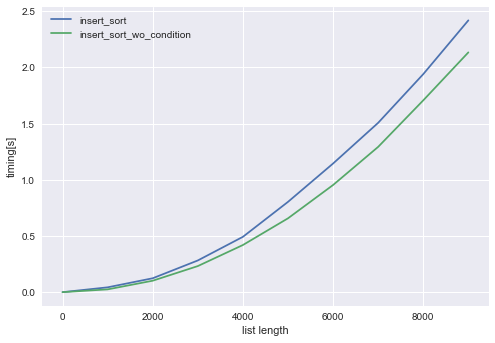

In [182]:
fig, ax = plt.subplots()
ax.plot(df.len,df.insert_sort, label = 'insert_sort')
ax.plot(df.len, df.insert_sort_wo_condition, label = 'insert_sort_wo_condition')
ax.legend()
ax.set_xlabel('list length')
ax.set_ylabel('timing[s]')

# autor
## jakub pietraszek
